In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time,sys,os
from sklearn.cluster import KMeans

prod = '6mo'
dys = 180
dates = '2020-12-14' # 直近のDL日

today = datetime.date.today()
last = today +datetime.timedelta(days=-dys)
last = pd.to_datetime(last)

os.makedirs('./csv/'+str(today),exist_ok = True)

In [2]:
TP = pd.read_csv('./csv/TOPIX_small1/Topix_small1.csv')
data =pd.DataFrame(TP)
stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

'''終値　毎日変わる'''
closes   = [] # 終値

for i in range(len(tickers.tickers)):
    start = time.time()
    closes.append(tickers.tickers[i].history(period=prod).Close)
    t = time.time() - start
    print(tickers.tickers[i],t)

closes = pd.DataFrame(closes).T   # DataFrame化
closes.columns = stocks           # カラム名の設定
closes = closes.ffill()           # 欠損データの補完
closes.to_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')

yfinance.Ticker object <1377.T> 1.0999844074249268
yfinance.Ticker object <1379.T> 1.2840638160705566
yfinance.Ticker object <1414.T> 1.0139985084533691
yfinance.Ticker object <1417.T> 1.0148344039916992
yfinance.Ticker object <1419.T> 1.0509991645812988
yfinance.Ticker object <1662.T> 0.9820041656494141
yfinance.Ticker object <1719.T> 0.8940002918243408
yfinance.Ticker object <1720.T> 1.0230014324188232
yfinance.Ticker object <1766.T> 1.2274913787841797
yfinance.Ticker object <1805.T> 0.8895039558410645
yfinance.Ticker object <1815.T> 1.3464953899383545
yfinance.Ticker object <1822.T> 0.852473258972168
yfinance.Ticker object <1835.T> 1.029320240020752
yfinance.Ticker object <1852.T> 1.017138957977295
yfinance.Ticker object <1861.T> 0.8508896827697754
yfinance.Ticker object <1881.T> 0.9535057544708252
yfinance.Ticker object <1885.T> 1.4369328022003174
yfinance.Ticker object <1890.T> 1.01194429397583
yfinance.Ticker object <1926.T> 0.841123104095459
yfinance.Ticker object <1941.T> 1.172

yfinance.Ticker object <4634.T> 1.030820608139038
yfinance.Ticker object <4641.T> 1.5273993015289307
yfinance.Ticker object <4668.T> 1.091606855392456
yfinance.Ticker object <4680.T> 1.2800383567810059
yfinance.Ticker object <4686.T> 1.0511765480041504
yfinance.Ticker object <4694.T> 0.985349178314209
yfinance.Ticker object <4708.T> 0.866788387298584
yfinance.Ticker object <4714.T> 0.9560701847076416
yfinance.Ticker object <4733.T> 1.132890224456787
yfinance.Ticker object <4743.T> 1.1526196002960205
yfinance.Ticker object <4812.T> 1.1591062545776367
yfinance.Ticker object <4819.T> 1.1081929206848145
yfinance.Ticker object <4848.T> 1.0926642417907715
yfinance.Ticker object <4849.T> 0.8799929618835449
yfinance.Ticker object <4917.T> 1.2598974704742432
yfinance.Ticker object <4919.T> 0.9696066379547119
yfinance.Ticker object <4928.T> 1.212092638015747
yfinance.Ticker object <4958.T> 1.0016670227050781
yfinance.Ticker object <4974.T> 0.7643187046051025
yfinance.Ticker object <4975.T> 1.109

yfinance.Ticker object <7231.T> 1.1220240592956543
yfinance.Ticker object <7239.T> 1.4397401809692383
yfinance.Ticker object <7241.T> 1.1435291767120361
yfinance.Ticker object <7242.T> 1.1896371841430664
yfinance.Ticker object <7244.T> 0.8415853977203369
yfinance.Ticker object <7246.T> 1.1690020561218262
yfinance.Ticker object <7250.T> 1.1204180717468262
yfinance.Ticker object <7251.T> 1.0118472576141357
yfinance.Ticker object <7274.T> 1.2043275833129883
yfinance.Ticker object <7278.T> 1.0777208805084229
yfinance.Ticker object <7294.T> 1.0174884796142578
yfinance.Ticker object <7296.T> 0.8754990100860596
yfinance.Ticker object <7321.T> 0.864422082901001
yfinance.Ticker object <7419.T> 1.057807207107544
yfinance.Ticker object <7476.T> 1.197239875793457
yfinance.Ticker object <7516.T> 1.145895004272461
yfinance.Ticker object <7522.T> 1.084362268447876
yfinance.Ticker object <7545.T> 1.0278496742248535
yfinance.Ticker object <7552.T> 1.0323662757873535
yfinance.Ticker object <7554.T> 0.97

yfinance.Ticker object <9810.T> 0.17729997634887695
yfinance.Ticker object <9830.T> 0.18097352981567383
yfinance.Ticker object <9869.T> 0.1610260009765625
yfinance.Ticker object <9928.T> 0.16005420684814453
yfinance.Ticker object <9934.T> 0.17296648025512695
yfinance.Ticker object <9936.T> 0.16829919815063477
yfinance.Ticker object <9945.T> 0.14100027084350586
yfinance.Ticker object <9946.T> 0.16899871826171875
yfinance.Ticker object <9948.T> 0.16000056266784668
yfinance.Ticker object <9956.T> 0.18799924850463867
yfinance.Ticker object <9997.T> 0.15767621994018555
yfinance.Ticker object <^N225> 0.13897418975830078


In [3]:
closes= pd.read_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')
closes['Date'] = pd.to_datetime(closes['Date'])
closes.set_index('Date',inplace=True)

earnings = pd.read_csv('./csv/'+str(dates)+'/earnings_'+str(dates)+'_'+prod+'_small498N.csv')
earnings.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
earnings['Date'] = pd.to_datetime(earnings['Date'])
earnings.set_index('Date',inplace=True)

shares= pd.read_csv('./csv/'+str(dates)+'/shares'+str(dates)+'_'+prod+'_small498N.csv')
shares.rename(columns={'Unnamed: 0':'stocks'},inplace=True)
shares.set_index('stocks',inplace=True)
shares = shares['0']

equity=pd.read_csv('./csv/'+str(dates)+'/equity'+str(dates)+'_'+prod+'_small498N.csv')
equity.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
equity['Date'] = pd.to_datetime(equity['Date'])
equity.set_index('Date',inplace=True)

eps=pd.read_csv('./csv/'+str(dates)+'/eps'+str(dates)+'_'+prod+'_small498N.csv')
eps.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
eps['Date'] = pd.to_datetime(eps['Date'])
eps.set_index('Date',inplace=True)

roe=pd.read_csv('./csv/'+str(dates)+'/roe'+str(dates)+'_'+prod+'_small498N.csv')
roe.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
roe['Date'] = pd.to_datetime(roe['Date'])
roe.set_index('Date',inplace=True)


In [4]:
closes

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9869.T,9928.T,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,3400.488770,1974.363159,4771.494141,1460.278198,1191.0,1840.268433,615.892029,561.0,7170.0,1043.0,...,3584.214111,2339.0,2290.372070,6000.0,1784.0,1520.097168,2120.118896,2128.009766,604.003113,21530.949219
2020-06-16,3390.531250,2009.210693,4840.861328,1561.055176,1255.0,1905.288574,633.544983,590.0,7400.0,1101.0,...,3643.703125,2358.0,2415.104980,6140.0,1826.0,1544.935303,2162.719482,2176.621826,644.666687,22582.210938
2020-06-17,3445.297607,2031.114868,4885.455078,1580.815308,1259.0,1897.407349,638.448608,576.0,7370.0,1095.0,...,3609.001221,2399.0,2379.747559,6080.0,1796.0,1525.064819,2132.998047,2168.685059,660.535400,22455.759766
2020-06-18,3395.510010,2010.206421,4885.455078,1582.791382,1243.0,1881.644897,646.294373,576.0,7460.0,1092.0,...,3599.086426,2359.0,2368.944092,6110.0,1807.0,1513.142456,2134.979492,2147.851562,634.748718,22355.460938
2020-06-19,3430.361328,2006.223755,4925.093262,1561.055176,1275.0,1857.015991,641.390747,582.0,7450.0,1095.0,...,3534.639893,2359.0,2370.908203,6120.0,1795.0,1491.284790,2135.970215,2160.748535,622.847168,22478.789062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-08,3350.000000,2058.000000,5010.000000,1628.000000,1432.0,1772.000000,718.000000,495.0,7760.0,1098.0,...,3435.000000,1963.0,2401.000000,5930.0,1703.0,1369.000000,2190.000000,2532.000000,896.000000,26467.080078
2020-12-09,3375.000000,2073.000000,5060.000000,1651.000000,1430.0,1773.000000,725.000000,501.0,7790.0,1104.0,...,3415.000000,1996.0,2465.000000,5940.0,1707.0,1385.000000,2240.000000,2609.000000,907.000000,26817.939453
2020-12-10,3470.000000,2101.000000,5090.000000,1665.000000,1413.0,1775.000000,718.000000,504.0,7750.0,1101.0,...,3430.000000,1994.0,2451.000000,6000.0,1729.0,1378.000000,2225.000000,2640.000000,903.000000,26756.240234


In [5]:
latest_closes = closes.iloc[-1]
latest_eps = eps.iloc[-1]
PE = latest_closes / latest_eps
PE= pd.DataFrame(PE)
PE['stocks'] =PE.index
PE.columns = ['PE','stocks'] 

In [6]:
closes["month"] = closes.index.month                              # 月カラムの作成
closes["end_of_month"] = closes.month.diff().shift(-1)            # 月末フラグカラムの作成
closes = closes[closes.end_of_month != 0]                         # 月末のみ抽出

monthly_rt = closes.pct_change().shift(-1)                        # 月次リターンの作成(ラグあり)
monthly_rt = monthly_rt.sub(monthly_rt["^N225"], axis=0)          # マーケットリターン控除

closes = closes[closes.index > str(last)]     # 6m
monthly_rt = monthly_rt[monthly_rt.index > str(last)]

closes = closes.drop(["^N225", "month", "end_of_month"], axis=1)  # 不要なカラムを削除
monthly_rt = monthly_rt.drop(["^N225", "month", "end_of_month"], axis=1)

eps_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns) # 月次リターンと同次元のDF作成
roe_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns)

for i in range(len(eps_df)):                                              # 各行への代入
    eps_df.iloc[i] = eps[eps.index < eps_df.index[i]].iloc[-1]

for i in range(len(roe_df)):
    roe_df.iloc[i] = roe[roe.index < roe_df.index[i]].iloc[-1]

per_df = closes/eps_df                                                    # PERデータフレームの作成

stack_monthly_rt = monthly_rt.stack()                                  # 1次元にスタック
stack_per_df = per_df.stack()
stack_roe_df = roe_df.stack()

df = pd.concat([stack_monthly_rt, stack_per_df, stack_roe_df], axis=1) # 結合
df.columns = ["rt", "per", "roe"]# カラム名の設定


df["rt"][df.rt > 1.0] = np.nan         
df.to_csv('./csv/'+str(dates)+'/df'+str(dates)+'_'+prod+'_small498N.csv')

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
df = pd.read_csv('./csv/'+str(dates)+'/df'+str(dates)+'_'+prod+'_small498N.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Unnamed: 1':'stocks'})
df = df.groupby(['Date','stocks']).mean()

In [8]:
value_df = df[(df.per < 10) & (df.roe > 0.1)]
#value_df = df
df1 =pd.pivot_table(value_df, index='stocks',columns='Date',values='rt')
df1=df1.fillna(0)
kmean_model = KMeans(n_clusters=10,random_state=0).fit(df1)
labels = kmean_model.labels_
df1['label'] = labels
kmean_list = df1.iloc[:,-1]

In [9]:
kmean_list.to_csv('./csv/'+str(dates)+'/kmean_list'+str(dates)+'_'+prod+'_small498N.csv')

In [10]:
df2 = df1.groupby(['label','stocks']).mean()
df2 = df2.stack()
df2 = pd.DataFrame(df2)

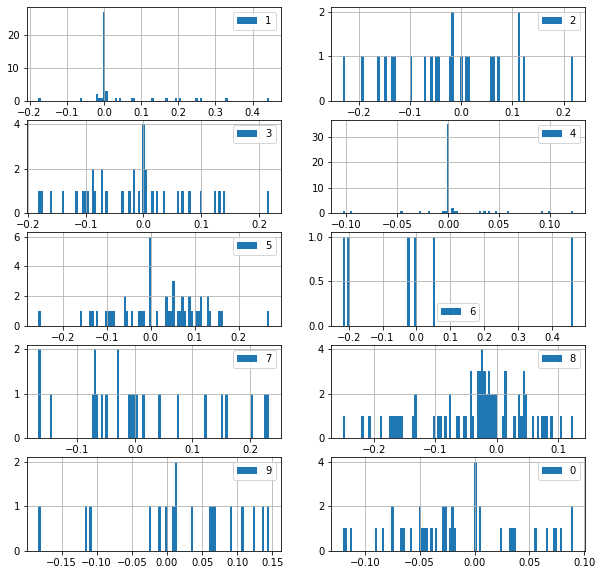

In [11]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)
ax0.hist(df2.query('label == 0'),bins=100)
ax0.legend('0')

ax1.hist(df2.query('label == 1'),bins=100)
ax1.legend('1')

ax2.hist(df2.query('label == 2'),bins=100)
ax2.legend('2')
ax3.hist(df2.query('label == 3'),bins=100)
ax3.legend('3')
ax4.hist(df2.query('label == 4'),bins=100)
ax4.legend('4')
ax5.hist(df2.query('label == 5'),bins=100)
ax5.legend('5')
ax6.hist(df2.query('label == 6'),bins=100)
ax6.legend('6')
ax7.hist(df2.query('label == 7'),bins=100)
ax7.legend('7')
ax8.hist(df2.query('label == 8'),bins=100)
ax8.legend('8')
ax9.hist(df2.query('label == 9'),bins=100)
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

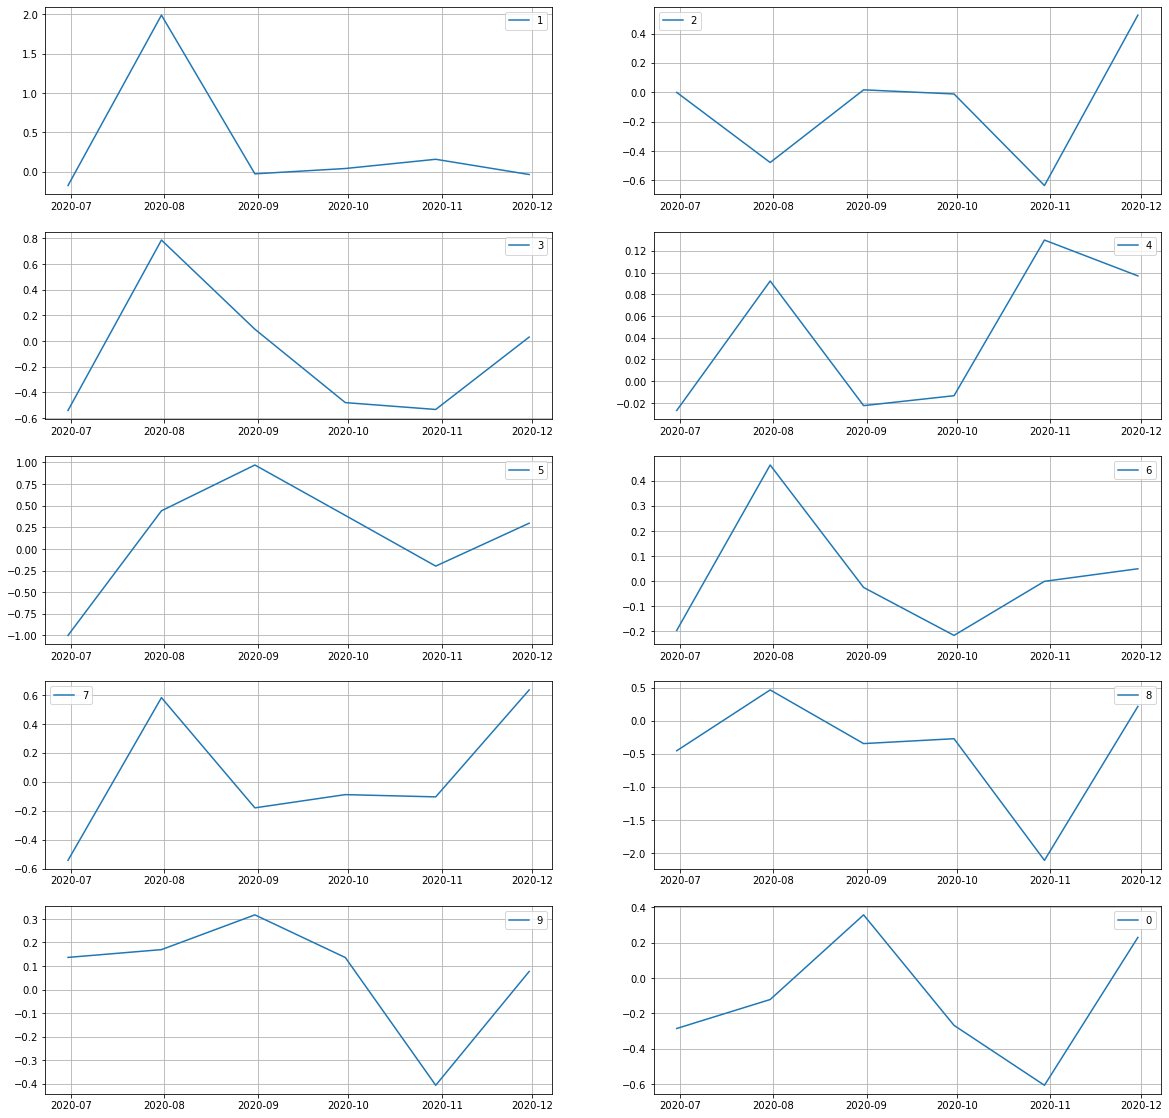

In [12]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)

df0 = df2.query('label == 0')
df00 =df0.groupby('Date').sum()
ax0.plot(df00)

df1 = df2.query('label == 1')
df11 =df1.groupby('Date').sum()
ax1.plot(df11)

df22 = df2.query('label == 2')
df222 =df22.groupby('Date').sum()
ax2.plot(df222)

df3 = df2.query('label == 3')
df33 =df3.groupby('Date').sum()
ax3.plot(df33)

df4 = df2.query('label == 4')
df44 =df4.groupby('Date').sum()
ax4.plot(df44)

df5 = df2.query('label == 5')
df55 =df5.groupby('Date').sum()
ax5.plot(df55)

df6 = df2.query('label == 6')
df66 =df6.groupby('Date').sum()
ax6.plot(df66)

df7 = df2.query('label == 7')
df77 =df7.groupby('Date').sum()
ax7.plot(df77)

df8 = df2.query('label == 8')
df88 =df8.groupby('Date').sum()
ax8.plot(df88)

df9 = df2.query('label == 9')
df99 =df9.groupby('Date').sum()
ax9.plot(df99)

ax0.legend('0')
ax1.legend('1')
ax2.legend('2')
ax3.legend('3')
ax4.legend('4')
ax5.legend('5')
ax6.legend('6')
ax7.legend('7')
ax8.legend('8')
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

In [13]:
TP= pd.read_csv('./csv/TOPIX_small1/TOPIX_small1_info.csv')
TP.rename(columns={'コード':'code'},inplace=True)

In [14]:
TP['stocks'] = [str(s)+".T" for s in TP.code]

In [15]:
tp_kmean = pd.merge(TP,kmean_list,on='stocks')
tp_kmean = pd.merge(PE,tp_kmean,on='stocks') # P/E 40以下 株価収益率の標準値は14から20の間 

In [16]:
tp_kmean.query('label == 0')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
5,9.225762,1835.T,20200930,東鉄工,1835,建設業,0.02%,TOPIX Small 1,0
9,6.822051,1969.T,20200930,高砂熱,1969,建設業,0.02%,TOPIX Small 1,0
29,4.664750,5302.T,20200930,日カーボン,5302,ガラス・土石製品,0.01%,TOPIX Small 1,0
33,5.199102,5480.T,20200930,冶金工,5480,鉄鋼,0.01%,TOPIX Small 1,0
35,9.848061,5911.T,20200930,横河ブＨＤ,5911,金属製品,0.02%,TOPIX Small 1,0
37,10.687037,6235.T,20200930,オプトラン,6235,機械,0.01%,TOPIX Small 1,0
55,4.086397,8934.T,20200930,サンフロンティア,8934,不動産業,0.01%,TOPIX Small 1,0


In [17]:
tp_kmean.query('label == 1')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
10,17.806573,2124.T,20200930,ＪＡＣ,2124,サービス業,0.00%,TOPIX Small 1,1
11,-162.359497,2157.T,20200930,コシダカＨＤ,2157,サービス業,0.00%,TOPIX Small 1,1
12,22.097513,2427.T,20200930,アウトソシング,2427,サービス業,0.02%,TOPIX Small 1,1
17,5.153331,3254.T,20200930,プレサンス,3254,不動産業,0.01%,TOPIX Small 1,1
28,14.093724,4848.T,20200930,フルキャストＨＤ,4848,サービス業,0.01%,TOPIX Small 1,1
40,12.877530,6432.T,20200930,竹内製作所,6432,機械,0.02%,TOPIX Small 1,1
44,12.995648,7198.T,20200930,アルヒ,7198,その他金融業,0.01%,TOPIX Small 1,1
57,8.718955,9302.T,20200930,三井倉ＨＤ,9302,倉庫・運輸関連業,0.01%,TOPIX Small 1,1


In [18]:
tp_kmean.query('label == 2')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
2,3.636388,1720.T,20200930,東急建設,1720,建設業,0.01%,TOPIX Small 1,2
15,7.309163,3107.T,20200930,ダイワボＨＤ,3107,卸売業,0.02%,TOPIX Small 1,2
24,9.142353,4047.T,20200930,関電化,4047,化学,0.01%,TOPIX Small 1,2
36,4.563996,5912.T,20200930,ＯＳＪＢＨＤ,5912,建設業,0.01%,TOPIX Small 1,2


In [19]:
tp_kmean.query('label == 3')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
0,8.348404,1419.T,20200930,タマホーム,1419,建設業,0.00%,TOPIX Small 1,3
1,8.501082,1719.T,20200930,安藤ハザマ,1719,建設業,0.03%,TOPIX Small 1,3
19,3.923051,3443.T,20200930,川田ＴＥＣＨ,3443,金属製品,0.00%,TOPIX Small 1,3
32,5.751946,5423.T,20200930,東製鉄,5423,鉄鋼,0.02%,TOPIX Small 1,3
43,38.844813,7148.T,20200930,ＦＰＧ,7148,証券、商品先物取引業,0.01%,TOPIX Small 1,3
59,9.489650,9699.T,20200930,西尾レントオール,9699,サービス業,0.01%,TOPIX Small 1,3


In [20]:
tp_kmean.query('label == 4')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
14,10.698037,3034.T,20200930,クオールＨＤ,3034,小売業,0.01%,TOPIX Small 1,4
23,-13.376997,3978.T,20200930,マクロミル,3978,情報・通信業,0.01%,TOPIX Small 1,4
25,15.362956,4321.T,20200930,ケネディクス,4321,サービス業,0.02%,TOPIX Small 1,4
30,4.797471,5352.T,20200930,黒崎播磨,5352,ガラス・土石製品,0.00%,TOPIX Small 1,4
31,11.278866,5393.T,20200930,ニチアス,5393,ガラス・土石製品,0.03%,TOPIX Small 1,4
38,15.819773,6340.T,20200930,渋谷工,6340,機械,0.01%,TOPIX Small 1,4
42,13.196182,6877.T,20200930,ＯＢＡＲＡ－Ｇ,6877,電気機器,0.01%,TOPIX Small 1,4
47,16.937099,7717.T,20200930,Ｖテク,7717,精密機器,0.01%,TOPIX Small 1,4
60,12.261164,9716.T,20200930,乃村工芸,9716,サービス業,0.01%,TOPIX Small 1,4


In [21]:
tp_kmean.query('label == 5')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
16,7.201541,3244.T,20200930,サムティ,3244,不動産業,0.01%,TOPIX Small 1,5
20,10.696632,3569.T,20200930,セーレン,3569,繊維製品,0.02%,TOPIX Small 1,5
34,5.575801,5702.T,20200930,大紀アルミ,5702,非鉄金属,0.00%,TOPIX Small 1,5
39,10.286915,6409.T,20200930,キトー,6409,機械,0.00%,TOPIX Small 1,5
48,10.858551,7943.T,20200930,ニチハ,7943,ガラス・土石製品,0.02%,TOPIX Small 1,5
50,10.689863,8850.T,20200930,スターツ,8850,不動産業,0.01%,TOPIX Small 1,5
51,7.649044,8892.T,20200930,日本エスコン,8892,不動産業,0.01%,TOPIX Small 1,5
54,6.880534,8923.T,20200930,トーセイ,8923,不動産業,0.01%,TOPIX Small 1,5


In [22]:
tp_kmean.query('label == 6')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
58,8.764754,9603.T,20200930,Ｈ．Ｉ．Ｓ．,9603,サービス業,0.01%,TOPIX Small 1,6


In [23]:
tp_kmean.query('label == 7')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
41,7.867704,6464.T,20200930,ツバキ・ナカシマ,6464,機械,0.01%,TOPIX Small 1,7
45,11.854730,7244.T,20200930,市光工,7244,電気機器,0.00%,TOPIX Small 1,7
53,10.964661,8920.T,20200930,東祥,8920,サービス業,0.00%,TOPIX Small 1,7
61,10.139826,9743.T,20200930,丹青社,9743,サービス業,0.01%,TOPIX Small 1,7


In [24]:
tp_kmean.query('label == 8')


,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
3,4.145541,1805.T,20200930,飛島建,1805,建設業,0.00%,TOPIX Small 1,8
6,7.496102,1852.T,20200930,浅沼組,1852,建設業,0.01%,TOPIX Small 1,8
7,6.195749,1861.T,20200930,熊谷組,1861,建設業,0.02%,TOPIX Small 1,8
8,7.060333,1890.T,20200930,東洋建,1890,建設業,0.01%,TOPIX Small 1,8
13,7.656442,2726.T,20200930,パルグループＨＤ,2726,小売業,0.00%,TOPIX Small 1,8
18,6.810773,3341.T,20200930,日本調剤,3341,小売業,0.00%,TOPIX Small 1,8
21,8.222132,3738.T,20200930,ティーガイア,3738,情報・通信業,0.01%,TOPIX Small 1,8
26,6.457603,4553.T,20200930,東和薬品,4553,医薬品,0.01%,TOPIX Small 1,8
46,8.475622,7419.T,20200930,ノジマ,7419,小売業,0.02%,TOPIX Small 1,8
49,7.307144,8020.T,20200930,兼松,8020,卸売業,0.02%,TOPIX Small 1,8


In [25]:
tp_kmean.query('label == 9')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
4,9.510829,1822.T,20200930,大豊建,1822,建設業,0.01%,TOPIX Small 1,9
22,9.393185,3932.T,20200930,アカツキ,3932,情報・通信業,0.01%,TOPIX Small 1,9
27,10.928409,4708.T,20200930,りらいあ,4708,サービス業,0.01%,TOPIX Small 1,9


In [26]:
time.time() - start

5.10397481918335